In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Load and manipulate data**

In [2]:

def load_data():
    URL = 'https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale'      
    data = pd.read_csv(URL, header=None, sep=' ')
    
    data=data.iloc[:,0:9]
    
    for column in range(1,8):
        data[column]=[float(value.split(':')[1]) for value in data.iloc[:,column]]
       
    # Rename the columns
    data.columns = ['Label']+[f'Feature_{i}' for i in range(1, 9)]
     
    return data

data = load_data()
print(data)


     Label  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0       -1  -0.294118   0.487437   0.180328  -0.292929  -1.000000   0.001490   
1        1  -0.882353  -0.145729   0.081967  -0.414141  -1.000000  -0.207153   
2       -1  -0.058824   0.839196   0.049180  -1.000000  -1.000000  -0.305514   
3        1  -0.882353  -0.105528   0.081967  -0.535354  -0.777778  -0.162444   
4       -1  -1.000000   0.376884  -0.344262  -0.292929  -0.602837   0.284650   
..     ...        ...        ...        ...        ...        ...        ...   
763      1   0.176471   0.015075   0.245902  -0.030303  -0.574468  -0.019374   
764      1  -0.764706   0.226131   0.147541  -0.454545  -1.000000   0.096870   
765      1  -0.411765   0.216080   0.180328  -0.535354  -0.735225  -0.219076   
766     -1  -0.882353   0.266332  -0.016393  -1.000000  -1.000000  -0.102832   
767      1  -0.882353  -0.065327   0.147541  -0.373737  -1.000000  -0.093890   

     Feature_7     Feature_8  
0    -0.

### **Data inspection**

The dataset includes 768 record

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      768 non-null    int64  
 1   Feature_1  768 non-null    float64
 2   Feature_2  768 non-null    float64
 3   Feature_3  768 non-null    float64
 4   Feature_4  768 non-null    float64
 5   Feature_5  768 non-null    float64
 6   Feature_6  768 non-null    float64
 7   Feature_7  768 non-null    float64
 8   Feature_8  759 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


In [4]:
diabetes = pd.DataFrame(data[~data['Feature_8'].isnull()])

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      759 non-null    int64  
 1   Feature_1  759 non-null    float64
 2   Feature_2  759 non-null    float64
 3   Feature_3  759 non-null    float64
 4   Feature_4  759 non-null    float64
 5   Feature_5  759 non-null    float64
 6   Feature_6  759 non-null    float64
 7   Feature_7  759 non-null    float64
 8   Feature_8  759 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


In [6]:
diabetes.loc[:, 'Feature_8'] = diabetes['Feature_8'].apply(lambda x: str(x).split(':')[1])

In [7]:
diabetes

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.0333333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.6
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.4
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.8
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.7
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [8]:
diabetes['Feature_8'] = pd.to_numeric(diabetes['Feature_8'], errors='coerce')

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      759 non-null    int64  
 1   Feature_1  759 non-null    float64
 2   Feature_2  759 non-null    float64
 3   Feature_3  759 non-null    float64
 4   Feature_4  759 non-null    float64
 5   Feature_5  759 non-null    float64
 6   Feature_6  759 non-null    float64
 7   Feature_7  759 non-null    float64
 8   Feature_8  759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.3 KB


In [10]:
diabetes.describe()

,Label,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,0.306983,-0.553902,0.211976,0.130392,-0.584860,-0.812335,-0.046738,-0.664571,-0.599166
std,0.952343,0.393479,0.321448,0.317587,0.322290,0.273006,0.235680,0.282291,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858668,-0.900000
50%,1.000000,-0.647059,0.165829,0.180328,-0.535354,-0.940898,-0.046200,-0.749787,-0.733333
75%,1.000000,-0.294118,0.407035,0.311475,-0.353535,-0.703310,0.087929,-0.532878,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
diabetes.loc[diabetes['Label'] == -1, 'Label'] = 0

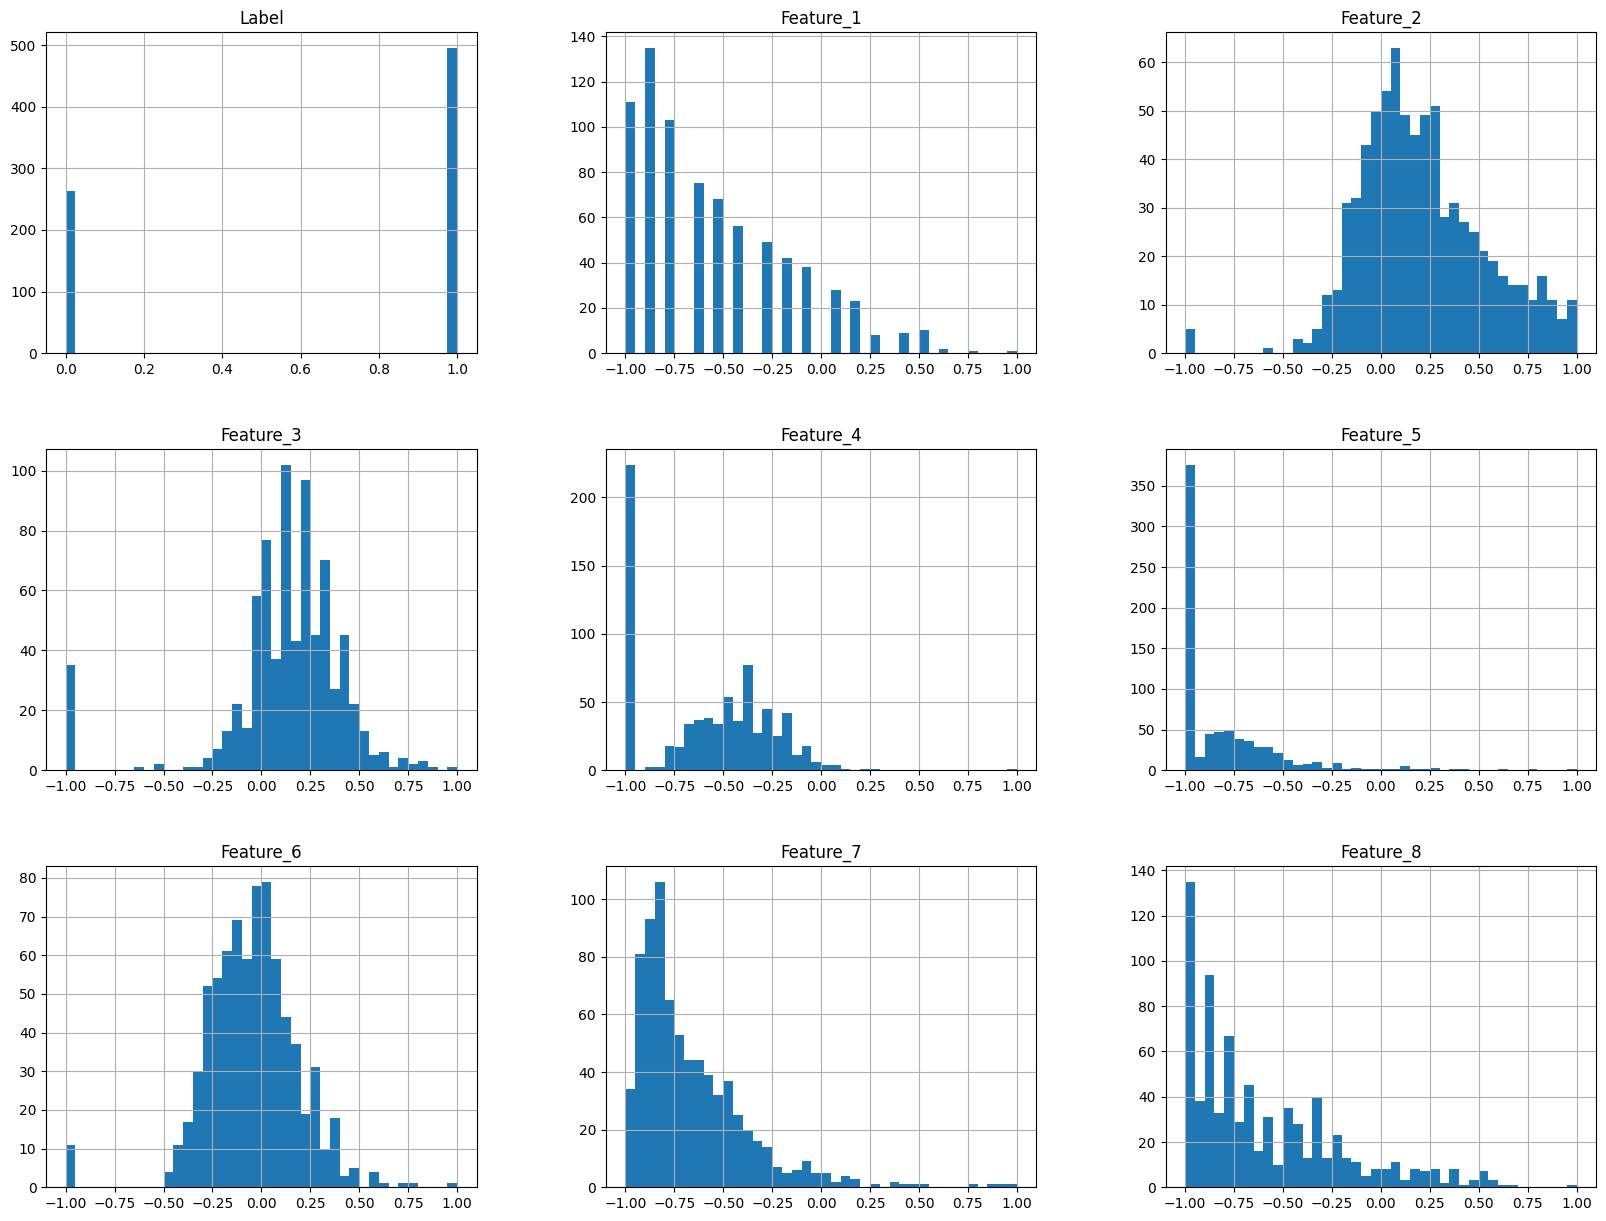

In [12]:
#Check distributions
import matplotlib as mpl
import matplotlib.pyplot as plt
graphs=diabetes.hist(bins=40,figsize=(20,15))

In [13]:
diabetes.loc[diabetes['Feature_2'] <-0.5,['Feature_2']]

,Feature_2
62,-0.557789
75,-1.000000
182,-1.000000
342,-1.000000
349,-1.000000
502,-1.000000


In [14]:
diabetes.loc[diabetes['Feature_3'] <-0.3,['Feature_3']]

,Feature_3
4,-0.344262
7,-1.000000
15,-1.000000
18,-0.508197
49,-1.000000
60,-1.000000
78,-1.000000
81,-1.000000
125,-0.508197
172,-1.000000


In [15]:
diabetes.loc[diabetes['Feature_3'] >0.83,['Feature_3']]

,Feature_3
106,1.000000
691,0.868852


In [16]:
diabetes.loc[diabetes['Feature_4'] >0.2,['Feature_4']]

,Feature_4
57,0.212121
445,0.272727
579,1.000000


In [17]:
diabetes.loc[diabetes['Feature_5'] >0,['Feature_5']]

,Feature_5
8,0.283688
13,1.000000
111,0.170213
153,0.146572
186,0.170213
220,0.130024
228,0.758865
247,0.607565
286,0.288416
370,0.099291


In [18]:
diabetes.loc[diabetes['Feature_6'] <-0.5,['Feature_6']]

,Feature_6
9,-1.0
49,-1.0
60,-1.0
81,-1.0
145,-1.0
371,-1.0
426,-1.0
494,-1.0
522,-1.0
684,-1.0


In [19]:
diabetes.loc[diabetes['Feature_6'] >0.4,['Feature_6']]

,Feature_6
84,0.454545
99,0.481371
120,0.585693
125,0.639344
154,0.427720
155,0.490313
177,1.000000
193,0.558867
247,0.558867
303,0.576751


In [20]:
diabetes.loc[diabetes['Feature_7'] >0.75,['Feature_7']]

,Feature_7
4,0.887276
228,0.922289
370,0.758326
445,1.000000


In [21]:
diabetes.loc[diabetes['Feature_8'] >0.75,['Feature_8']]

,Feature_8
459,1.0


In [22]:
diabetes.loc[diabetes['Feature_2'] <-0.5,['Feature_2']]=np.nan
diabetes.loc[diabetes['Feature_3'] <-0.3,['Feature_3']]=np.nan
diabetes.loc[diabetes['Feature_3'] >0.83,['Feature_3']]=np.nan
diabetes.loc[diabetes['Feature_4'] >0.2,['Feature_4']]=np.nan
diabetes.loc[diabetes['Feature_5'] >0,['Feature_5']]=np.nan
diabetes.loc[diabetes['Feature_6'] <-0.5,['Feature_6']]=np.nan
diabetes.loc[diabetes['Feature_6'] >0.5,['Feature_6']]=np.nan
diabetes.loc[diabetes['Feature_7'] >0.75,['Feature_7']]=np.nan
diabetes.loc[diabetes['Feature_8'] >0.75,['Feature_8']]=np.nan

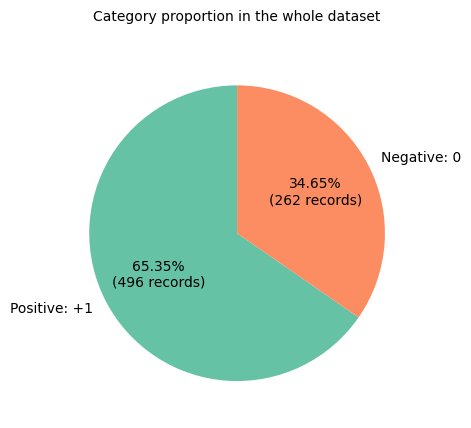

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

labels_diabetes = ['Positive: +1','Negative: 0']

label_count = diabetes['Label'].value_counts()

# Custom function to format the label
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} records)".format(pct, absolute)

plt.pie(x=label_count, labels=labels_diabetes, autopct=lambda pct: func(pct, label_count), textprops={'fontsize':10}, 
        colors=sns.color_palette('Set2'), startangle=90)

plt.title(
    label="Category proportion in the whole dataset", 
    fontdict={"fontsize":10},
    pad=20
)

plt.show()


In [24]:
# Your code here
c1=diabetes.loc[diabetes['Label']==+1].iloc[:, 1:]
c2=diabetes.loc[diabetes['Label']==0].iloc[:, 1:]


import numpy as np
import heapq as hp

def calculate_t_score(c1, c2):
    mean_c1 = np.mean(c1,axis=0)
    mean_c2 = np.mean(c2,axis=0)
    stddev_c1 = np.std(c1)
    stddev_c2 = np.std(c2)
    #print(stddev_c1)
    t_score = round((mean_c2 - mean_c1) / (0.5 * (stddev_c2 + stddev_c1)),4)
  
    t_score_dic =dict(t_score)
    t_score_list = [(np.abs(value), key) for key, value in t_score_dic.items()]

    hp.heapify(t_score_list)
    
    return hp.nlargest(8, t_score_list, key=lambda x: x[0])


calculate_t_score(c1, c2) #Large values for the T-score (either positive or negative) indicate discriminative ability.

[(1.1564, 'Feature_2'),
 (0.6872, 'Feature_6'),
 (0.5293, 'Feature_8'),
 (0.4557, 'Feature_1'),
 (0.3846, 'Feature_3'),
 (0.3279, 'Feature_7'),
 (0.1603, 'Feature_5'),
 (0.1185, 'Feature_4')]

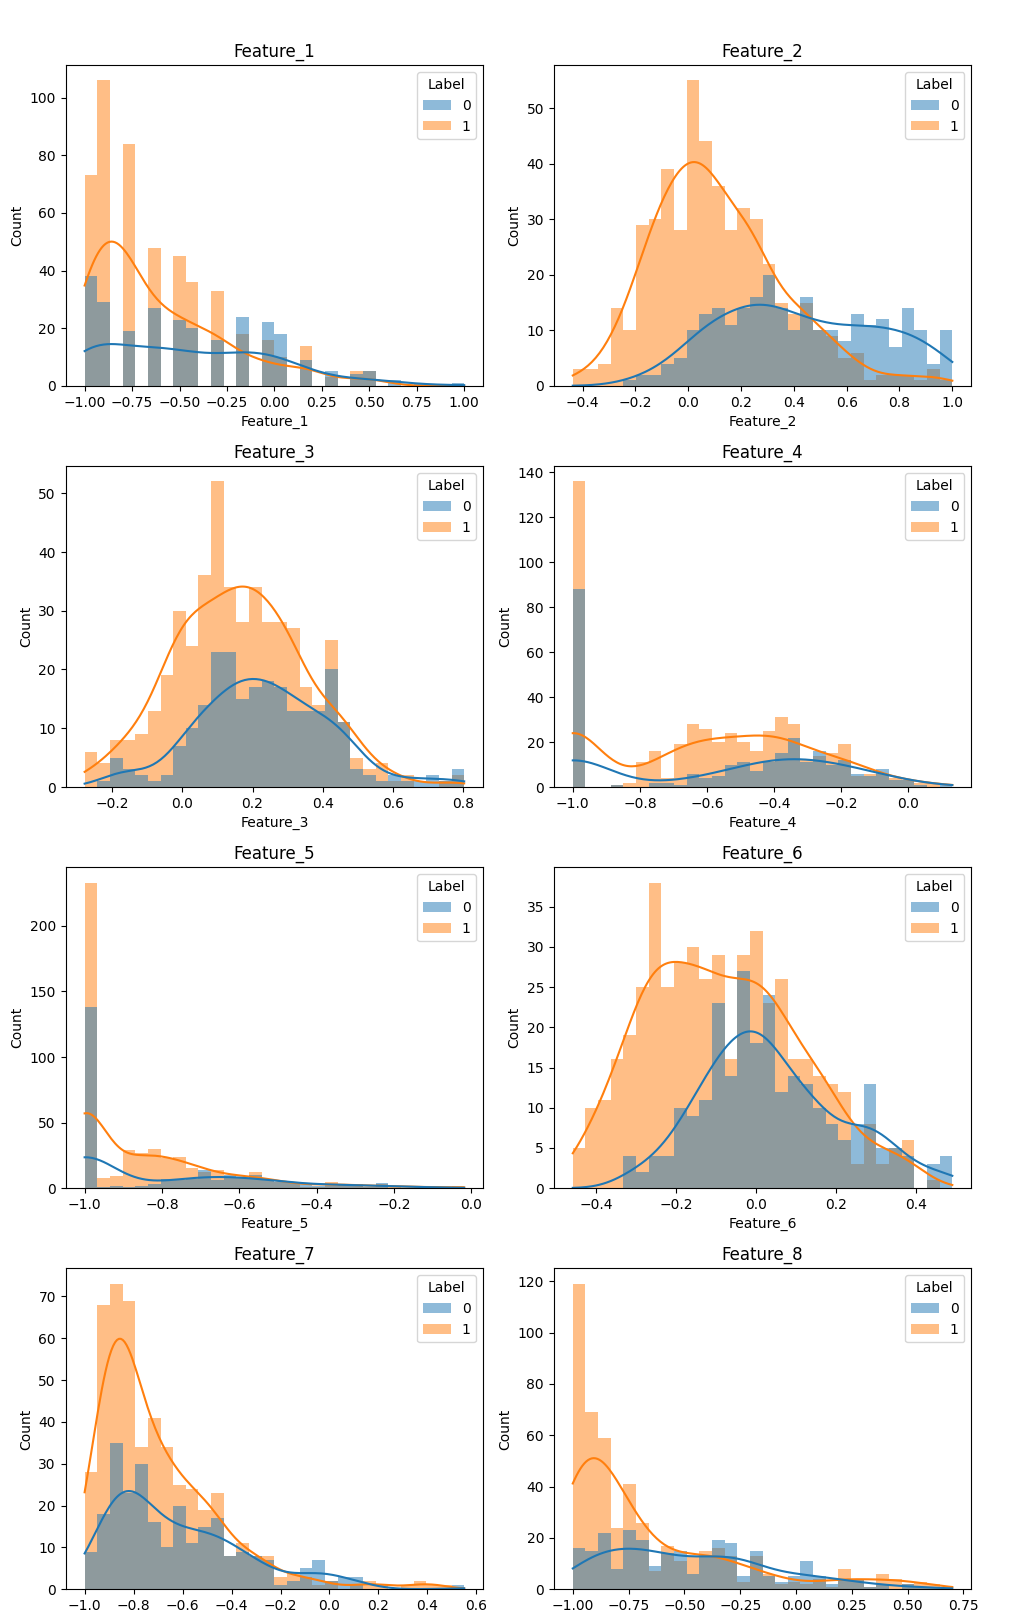

In [25]:
# Determine the number of features
n_features = 8  # Exclude the target column

# Calculate the required number of rows and columns for subplots
n_cols = 2
n_rows, remainder = divmod(n_features, n_cols)
if remainder > 0:
    n_rows += 1

# Create a figure and axes with a smaller figsize
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Iterate through the features and plot histograms
for i, (feature, ax) in enumerate(zip(diabetes.columns[1:11], axes)):
    # Plot the histogram using seaborn
    sns.histplot(data=diabetes, x=feature, hue='Label', bins=30, kde=True, ax=ax, edgecolor=None)
    
    # Set the title for the subplot
    ax.set_title(feature)
    
    # Remove the x-axis label from all but the bottom subplots
    if i >= n_features - n_cols:
        ax.set_xlabel("")

    # Add the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Adjust the layout of subplots
plt.tight_layout()

# Add a common legend
fig.legend(handles, labels, loc="lower center", bbox_to_anchor=(1, 1), ncol=3, title=None, frameon=False)

# Display the plot
plt.show()


1.1. Splitting the dataset

In [26]:
# Your code here
from sklearn.model_selection import train_test_split

# Get the test and train set
# stratify ensures that the class distribution in the original dataset is preserved in both the training and test sets
# random_state ensures the data will be split in a way that remains consistent every time you run the code with the same random seed (42 in this case).
train_set, test_set = train_test_split(diabetes,test_size=0.2,stratify=diabetes['Label'],random_state=42)
train, val = train_test_split(train_set,test_size=0.2,stratify=train_set['Label'],random_state=42)

In [27]:
# Get x and y for train, val and test
X= np.array(train.iloc[:,1:])
y = np.array(train['Label']).astype(int)

X_val= np.array(val.iloc[:,1:])
y_val = np.array(val['Label']).astype(int)

X_test = np.array(test_set.iloc[:,1:])
y_test = np.array(test_set['Label']).astype(int)

# verify the size of the set
print([X.shape,y.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape])

[(485, 8), (485,), (122, 8), (122,), (152, 8), (152,)]


In [28]:
train, val = train_test_split(train_set,test_size=0.2,stratify=train_set['Label'],random_state=42)

In [29]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the data and transform it
X = imputer.fit_transform(X)
X_val = imputer.fit_transform(X_val)
X_test= imputer.fit_transform(X_test)
print([X.shape,y.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape])

[(485, 8), (485,), (122, 8), (122,), (152, 8), (152,)]


In [30]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Total Unique Classes in the Training set:  2


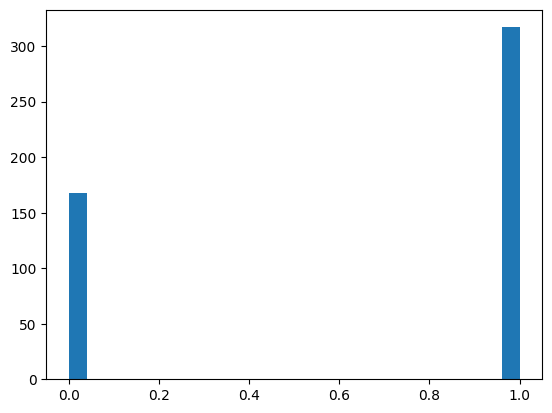

Total Unique Classes in the validation set:  2


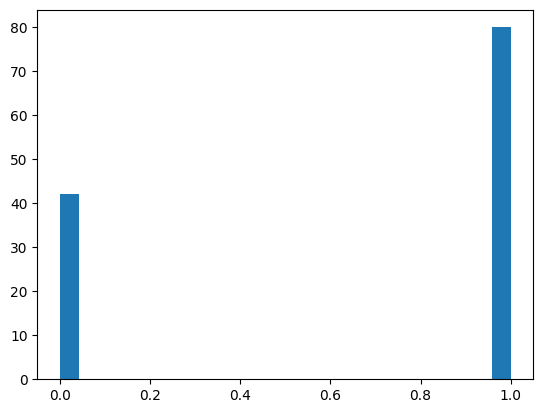

Total Unique Classes in the test set:  2


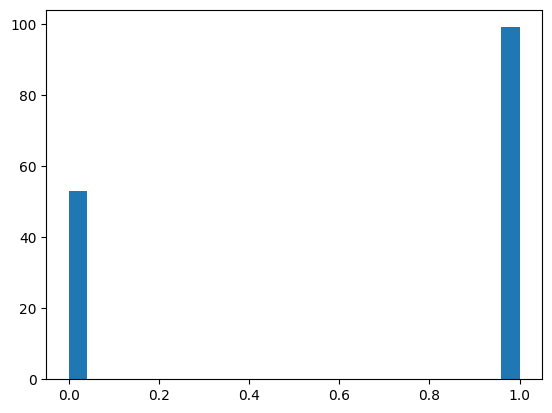

In [31]:
# Check number of classes
unique_total = np.unique(y).shape[0]
print("Total Unique Classes in the Training set: ", unique_total)

# Let's look at the distribution of labels in the training, validation and test sets
plt.hist(y, bins=25)
plt.show()

unique_total_val = np.unique(y_val).shape[0]
print("Total Unique Classes in the validation set: ", unique_total_val)

plt.hist(y_val, bins=24)
plt.show()

unique_total_test = np.unique(y_test).shape[0]
print("Total Unique Classes in the test set: ", unique_total_test)

plt.hist(y_test,bins=24)
plt.show()

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


# Load your dataset and preprocess it as needed
# For example, load X (features) and y (labels)

# Create an MLP model
model = keras.models.Sequential(tf.random.set_seed(42))
model.add(keras.layers.Dense(256, activation='tanh', input_shape=(8,)))

model.add(keras.layers.Dropout(0.5))  # Consider adding dropout for regularization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(128, activation='tanh'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(64, activation='tanh'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(32, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(16, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(8, activation='tanh'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(1, activation='sigmoid'))# For binary classification


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                       

Optimization

In [34]:

def tune_hyperparamiter(epochs,batchsize,optimizer, learningrate):
    # Compile the model
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
    model.compile(optimizer=optimizer(learningrate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

    # Define early stopping & model checkpointing
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
    
    history = model.fit(X, y,
                    epochs=epochs,              
                    batch_size=batchsize,          # Using mini-batch gradient descent
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)  
          
    
    max_val_acc = np.max(history.history['val_accuracy'])
    
    return(max_val_acc, history, model)

In [35]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

In [36]:
batchsize=32

Epoch 1/8
16/16 [==============================] - 3s 43ms/step - loss: 0.7086 - accuracy: 0.6041 - val_loss: 0.5709 - val_accuracy: 0.7459
Epoch 2/8
16/16 [==============================] - 0s 13ms/step - loss: 0.6102 - accuracy: 0.6701 - val_loss: 0.5293 - val_accuracy: 0.7213
Epoch 3/8
16/16 [==============================] - 0s 11ms/step - loss: 0.5676 - accuracy: 0.7072 - val_loss: 0.5226 - val_accuracy: 0.7295
Epoch 4/8
16/16 [==============================] - 0s 8ms/step - loss: 0.5578 - accuracy: 0.7113 - val_loss: 0.5343 - val_accuracy: 0.7295
Epoch 5/8
16/16 [==============================] - 0s 8ms/step - loss: 0.5712 - accuracy: 0.7072 - val_loss: 0.5446 - val_accuracy: 0.7295
Epoch 6/8
16/16 [==============================] - 0s 8ms/step - loss: 0.5496 - accuracy: 0.7113 - val_loss: 0.5242 - val_accuracy: 0.7459
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.5539 - accuracy: 0.7175 - val_loss: 0.5153 - val_accuracy: 0.7377
Epoch 8/8
16/16 [=======

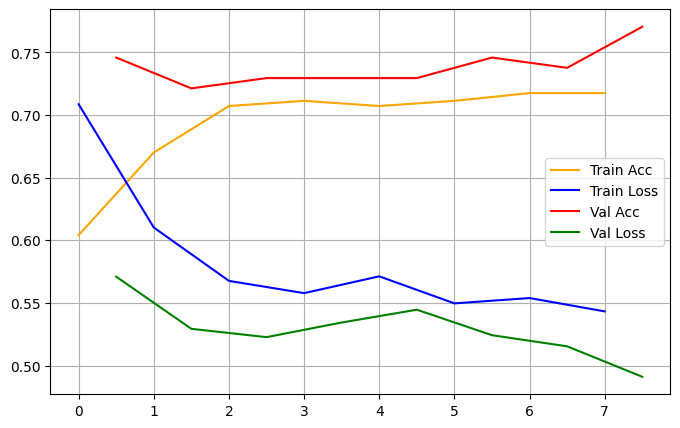

Epoch 1/32
16/16 [==============================] - 3s 32ms/step - loss: 0.4897 - accuracy: 0.7567 - val_loss: 0.5214 - val_accuracy: 0.7377
Epoch 2/32
16/16 [==============================] - 0s 8ms/step - loss: 0.4441 - accuracy: 0.8206 - val_loss: 0.5353 - val_accuracy: 0.7623
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.4652 - accuracy: 0.7753 - val_loss: 0.5159 - val_accuracy: 0.7787
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.4953 - accuracy: 0.7670 - val_loss: 0.5331 - val_accuracy: 0.7787
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.4958 - accuracy: 0.7567 - val_loss: 0.5256 - val_accuracy: 0.7787
Epoch 6/32
16/16 [==============================] - 0s 10ms/step - loss: 0.4572 - accuracy: 0.7835 - val_loss: 0.5252 - val_accuracy: 0.7705
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.4853 - accuracy: 0.7711 - val_loss: 0.5096 - val_accuracy: 0.7951
Epoch 8/32
16/16 [

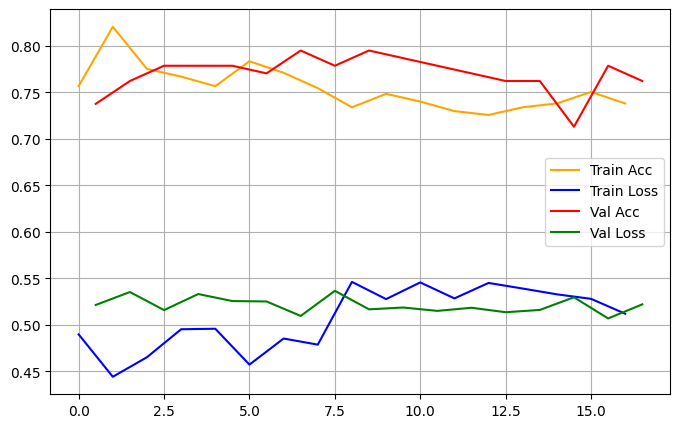

Epoch 1/100
16/16 [==============================] - 3s 31ms/step - loss: 0.3958 - accuracy: 0.8247 - val_loss: 0.5749 - val_accuracy: 0.7787
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3784 - accuracy: 0.8495 - val_loss: 0.5950 - val_accuracy: 0.7787
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3984 - accuracy: 0.8144 - val_loss: 0.6184 - val_accuracy: 0.7705
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4045 - accuracy: 0.8165 - val_loss: 0.6445 - val_accuracy: 0.7541
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4219 - accuracy: 0.7897 - val_loss: 0.6032 - val_accuracy: 0.7787
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8742 - val_loss: 0.6257 - val_accuracy: 0.7541
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.4013 - accuracy: 0.8371 - val_loss: 0.6357 - val_accuracy: 0.7541
Epoch 8/100


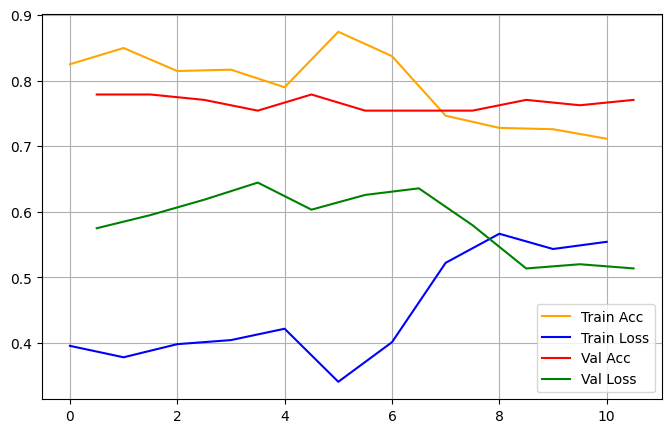

Epoch 1/120
16/16 [==============================] - 3s 31ms/step - loss: 0.2546 - accuracy: 0.9113 - val_loss: 0.6467 - val_accuracy: 0.7951
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3744 - accuracy: 0.8392 - val_loss: 0.6448 - val_accuracy: 0.7787
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4054 - accuracy: 0.8124 - val_loss: 0.6505 - val_accuracy: 0.7787
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4152 - accuracy: 0.8103 - val_loss: 0.6314 - val_accuracy: 0.7951
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4266 - accuracy: 0.8124 - val_loss: 0.5998 - val_accuracy: 0.7951
Epoch 6/120
16/16 [==============================] - 0s 12ms/step - loss: 0.3592 - accuracy: 0.8515 - val_loss: 0.6011 - val_accuracy: 0.7869
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.4211 - accuracy: 0.8082 - val_loss: 0.5647 - val_accuracy: 0.7951
Epoch 8/120

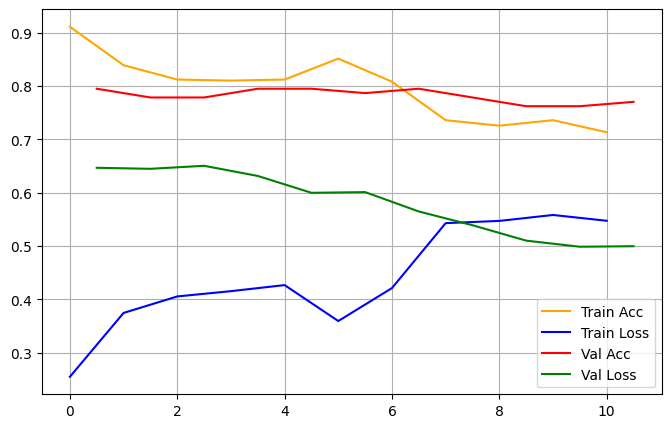

Epoch 1/8
16/16 [==============================] - 4s 44ms/step - loss: 0.1811 - accuracy: 0.9526 - val_loss: 0.6563 - val_accuracy: 0.7869
Epoch 2/8
16/16 [==============================] - 0s 10ms/step - loss: 0.3714 - accuracy: 0.8392 - val_loss: 0.6587 - val_accuracy: 0.8033
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.3969 - accuracy: 0.8289 - val_loss: 0.6609 - val_accuracy: 0.7951
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.3875 - accuracy: 0.8371 - val_loss: 0.6659 - val_accuracy: 0.7869
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.4029 - accuracy: 0.8247 - val_loss: 0.6617 - val_accuracy: 0.7951
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.3358 - accuracy: 0.8722 - val_loss: 0.6649 - val_accuracy: 0.7951
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.3465 - accuracy: 0.8474 - val_loss: 0.6623 - val_accuracy: 0.7869
Epoch 8/8
16/16 [========

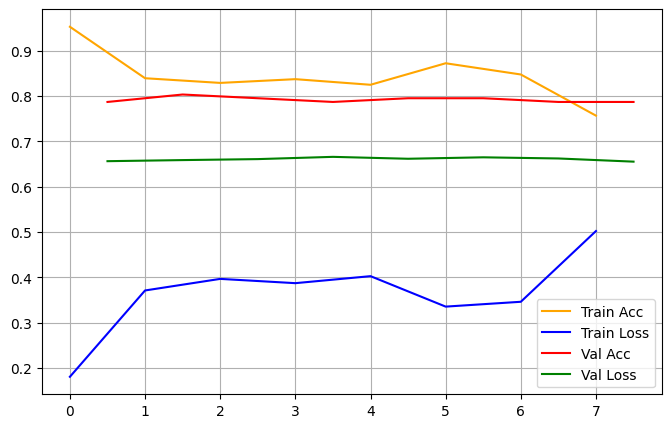

Epoch 1/32
16/16 [==============================] - 3s 31ms/step - loss: 0.1857 - accuracy: 0.9464 - val_loss: 0.6651 - val_accuracy: 0.7869
Epoch 2/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3247 - accuracy: 0.8804 - val_loss: 0.6744 - val_accuracy: 0.7869
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.3488 - accuracy: 0.8474 - val_loss: 0.6773 - val_accuracy: 0.7869
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3340 - accuracy: 0.8639 - val_loss: 0.6845 - val_accuracy: 0.7869
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8454 - val_loss: 0.6808 - val_accuracy: 0.7869
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3021 - accuracy: 0.8887 - val_loss: 0.6884 - val_accuracy: 0.7869
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.3208 - accuracy: 0.8639 - val_loss: 0.6849 - val_accuracy: 0.7869
Epoch 8/32
16/16 [=

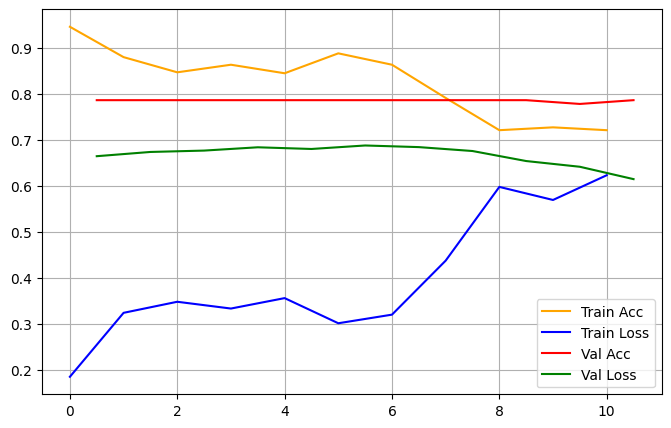

Epoch 1/100
16/16 [==============================] - 4s 35ms/step - loss: 0.1774 - accuracy: 0.9546 - val_loss: 0.6743 - val_accuracy: 0.7869
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3239 - accuracy: 0.8804 - val_loss: 0.6830 - val_accuracy: 0.7869
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3495 - accuracy: 0.8454 - val_loss: 0.6854 - val_accuracy: 0.7869
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3343 - accuracy: 0.8660 - val_loss: 0.6925 - val_accuracy: 0.7869
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3567 - accuracy: 0.8454 - val_loss: 0.6880 - val_accuracy: 0.7869
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3019 - accuracy: 0.8887 - val_loss: 0.6955 - val_accuracy: 0.7869
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3206 - accuracy: 0.8639 - val_loss: 0.6914 - val_accuracy: 0.7869
Epoch 8/100


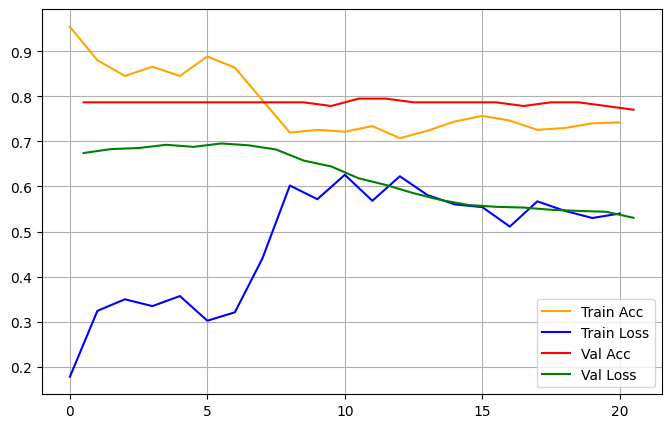

Epoch 1/120
16/16 [==============================] - 3s 31ms/step - loss: 0.1961 - accuracy: 0.9546 - val_loss: 0.6348 - val_accuracy: 0.7869
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3030 - accuracy: 0.8948 - val_loss: 0.6514 - val_accuracy: 0.7869
Epoch 3/120
16/16 [==============================] - 0s 10ms/step - loss: 0.3197 - accuracy: 0.8763 - val_loss: 0.6596 - val_accuracy: 0.7869
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3086 - accuracy: 0.8948 - val_loss: 0.6702 - val_accuracy: 0.7869
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3288 - accuracy: 0.8619 - val_loss: 0.6724 - val_accuracy: 0.7869
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.2866 - accuracy: 0.8990 - val_loss: 0.6819 - val_accuracy: 0.7869
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3043 - accuracy: 0.8701 - val_loss: 0.6826 - val_accuracy: 0.7869
Epoch 8/120

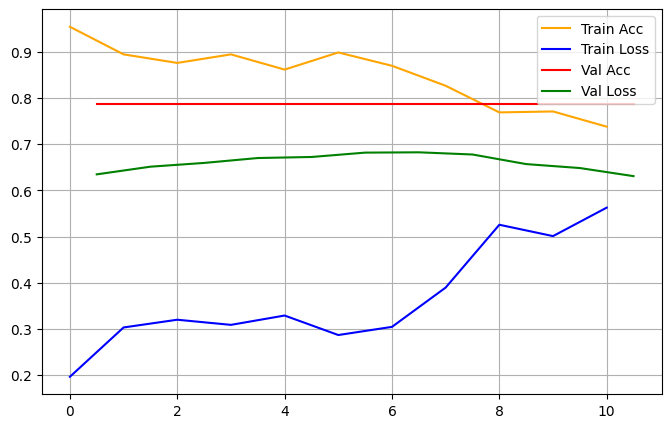

Epoch 1/8
16/16 [==============================] - 3s 35ms/step - loss: 0.1862 - accuracy: 0.9546 - val_loss: 0.6348 - val_accuracy: 0.7869
Epoch 2/8
16/16 [==============================] - 0s 8ms/step - loss: 0.3039 - accuracy: 0.8928 - val_loss: 0.6384 - val_accuracy: 0.7869
Epoch 3/8
16/16 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 0.8701 - val_loss: 0.6397 - val_accuracy: 0.7869
Epoch 4/8
16/16 [==============================] - 0s 8ms/step - loss: 0.3124 - accuracy: 0.8948 - val_loss: 0.6431 - val_accuracy: 0.7869
Epoch 5/8
16/16 [==============================] - 0s 8ms/step - loss: 0.3328 - accuracy: 0.8660 - val_loss: 0.6441 - val_accuracy: 0.7869
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.2933 - accuracy: 0.8928 - val_loss: 0.6451 - val_accuracy: 0.7869
Epoch 7/8
16/16 [==============================] - 0s 8ms/step - loss: 0.3095 - accuracy: 0.8680 - val_loss: 0.6445 - val_accuracy: 0.7869
Epoch 8/8
16/16 [=========

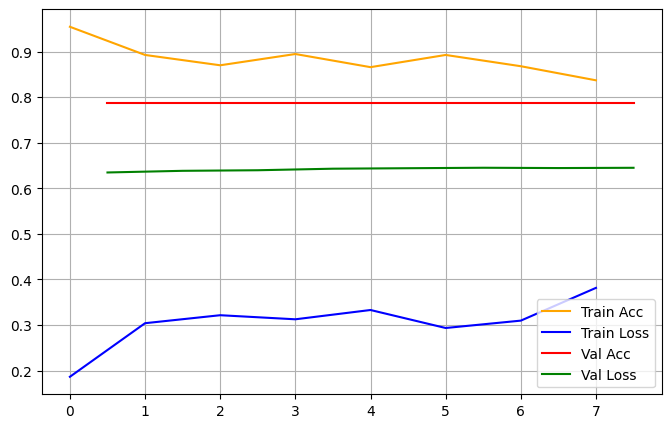

Epoch 1/32
16/16 [==============================] - 3s 32ms/step - loss: 0.1835 - accuracy: 0.9546 - val_loss: 0.6442 - val_accuracy: 0.7869
Epoch 2/32
16/16 [==============================] - 0s 8ms/step - loss: 0.2990 - accuracy: 0.8948 - val_loss: 0.6475 - val_accuracy: 0.7869
Epoch 3/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3180 - accuracy: 0.8701 - val_loss: 0.6483 - val_accuracy: 0.7869
Epoch 4/32
16/16 [==============================] - 0s 9ms/step - loss: 0.3086 - accuracy: 0.8990 - val_loss: 0.6516 - val_accuracy: 0.7869
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3291 - accuracy: 0.8639 - val_loss: 0.6523 - val_accuracy: 0.7869
Epoch 6/32
16/16 [==============================] - 0s 9ms/step - loss: 0.2897 - accuracy: 0.8969 - val_loss: 0.6529 - val_accuracy: 0.7869
Epoch 7/32
16/16 [==============================] - 0s 8ms/step - loss: 0.3066 - accuracy: 0.8701 - val_loss: 0.6520 - val_accuracy: 0.7869
Epoch 8/32
16/16 [=

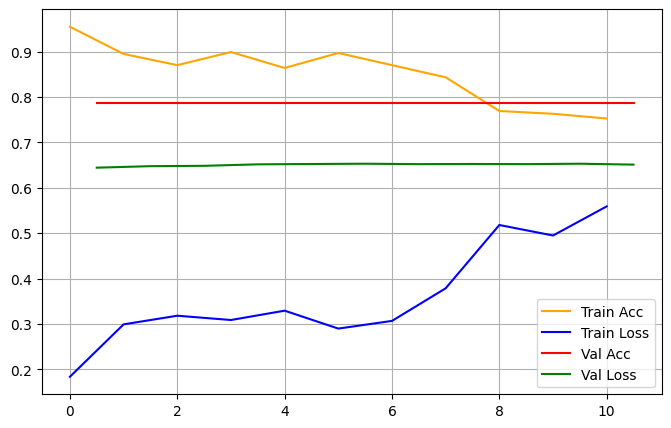

Epoch 1/100
16/16 [==============================] - 3s 33ms/step - loss: 0.1824 - accuracy: 0.9546 - val_loss: 0.6436 - val_accuracy: 0.7869
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2986 - accuracy: 0.8948 - val_loss: 0.6472 - val_accuracy: 0.7869
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3179 - accuracy: 0.8701 - val_loss: 0.6483 - val_accuracy: 0.7869
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3084 - accuracy: 0.8990 - val_loss: 0.6518 - val_accuracy: 0.7869
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3289 - accuracy: 0.8639 - val_loss: 0.6527 - val_accuracy: 0.7869
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.2894 - accuracy: 0.8990 - val_loss: 0.6535 - val_accuracy: 0.7869
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3064 - accuracy: 0.8701 - val_loss: 0.6526 - val_accuracy: 0.7869
Epoch 8/100


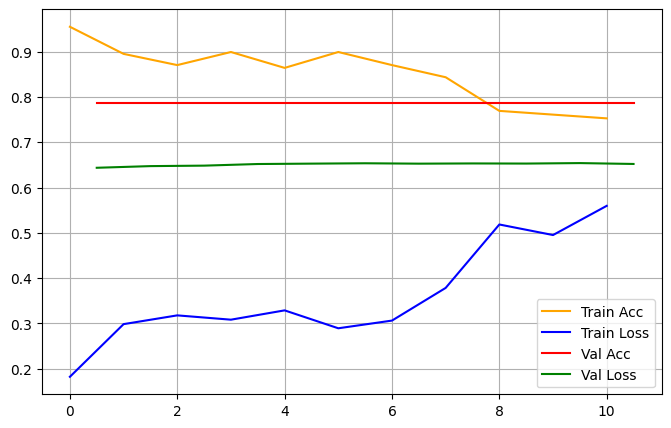

Epoch 1/120
16/16 [==============================] - 3s 31ms/step - loss: 0.1814 - accuracy: 0.9546 - val_loss: 0.6431 - val_accuracy: 0.7869
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.2982 - accuracy: 0.8948 - val_loss: 0.6471 - val_accuracy: 0.7869
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3178 - accuracy: 0.8701 - val_loss: 0.6484 - val_accuracy: 0.7869
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3082 - accuracy: 0.8990 - val_loss: 0.6522 - val_accuracy: 0.7869
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3287 - accuracy: 0.8639 - val_loss: 0.6532 - val_accuracy: 0.7869
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.2892 - accuracy: 0.9010 - val_loss: 0.6541 - val_accuracy: 0.7869
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.3062 - accuracy: 0.8701 - val_loss: 0.6534 - val_accuracy: 0.7869
Epoch 8/120


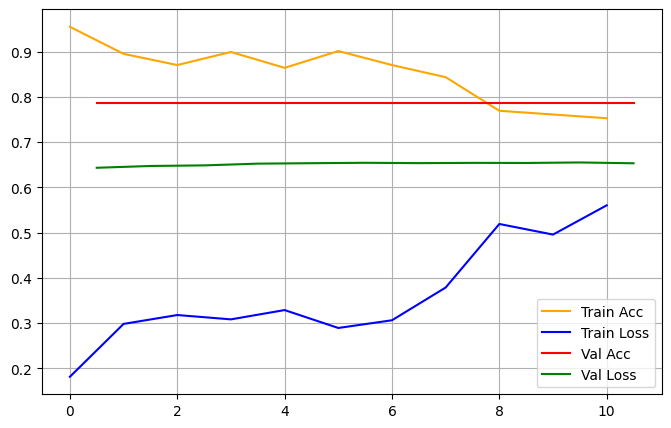

Epoch 1/8
16/16 [==============================] - 4s 33ms/step - loss: 0.6861 - accuracy: 0.6309 - val_loss: 0.6443 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6520 - accuracy: 0.6536 - val_loss: 0.6465 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6534 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6449 - accuracy: 0.6536 - val_loss: 0.6674 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6518 - accuracy: 0.6536 - val_loss: 0.6475 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6503 - accuracy: 0.6371 - val_loss: 0.6583 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6534 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=========

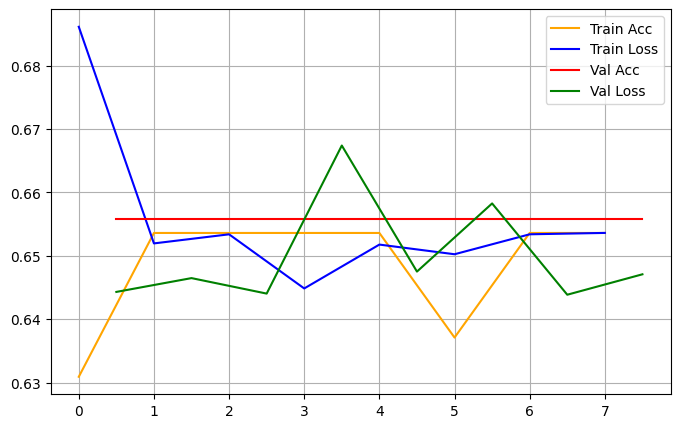

Epoch 1/32
16/16 [==============================] - 4s 32ms/step - loss: 0.6570 - accuracy: 0.6536 - val_loss: 0.6689 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.6536 - val_loss: 0.7169 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.6536 - val_loss: 0.6578 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6613 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6478 - accuracy: 0.6536 - val_loss: 0.6508 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6451 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6506 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

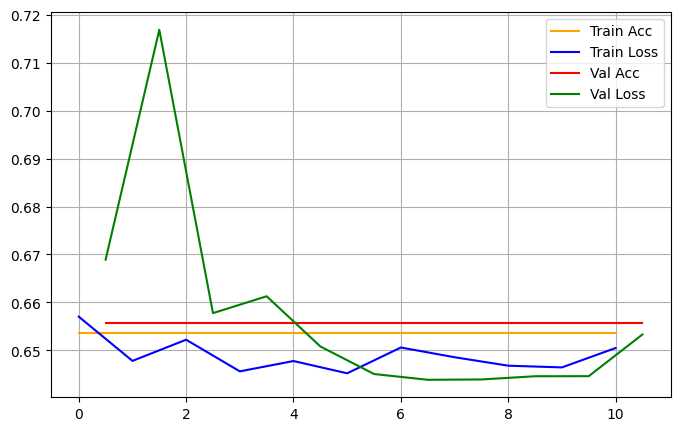

Epoch 1/100
16/16 [==============================] - 4s 32ms/step - loss: 0.6552 - accuracy: 0.6536 - val_loss: 0.6443 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6467 - accuracy: 0.6536 - val_loss: 0.6533 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6531 - accuracy: 0.6536 - val_loss: 0.6459 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.6536 - val_loss: 0.6661 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6487 - accuracy: 0.6536 - val_loss: 0.6459 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.6536 - val_loss: 0.6496 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6531 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


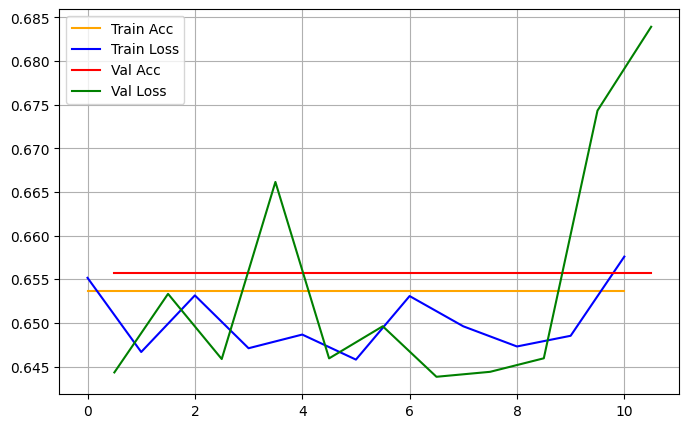

Epoch 1/120
16/16 [==============================] - 4s 30ms/step - loss: 0.6525 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6485 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.6536 - val_loss: 0.6755 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6466 - accuracy: 0.6536 - val_loss: 0.6599 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6470 - accuracy: 0.6536 - val_loss: 0.6468 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6645 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6544 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120


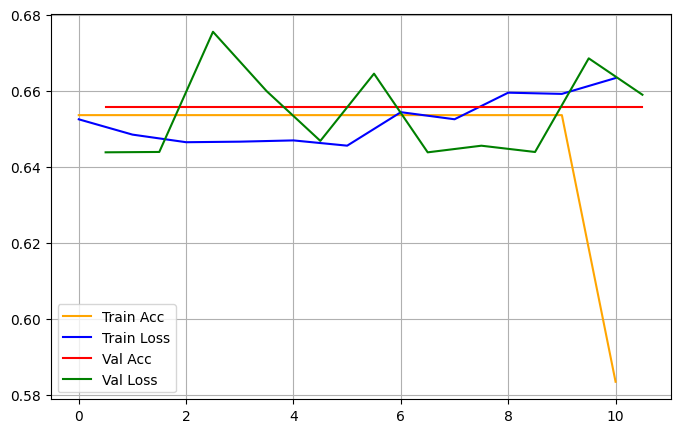

Epoch 1/8
16/16 [==============================] - 5s 32ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6461 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6460 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 12ms/step - loss: 0.6461 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6441 - val_accuracy: 0.6557
Epoch 8/8
16/16 [========

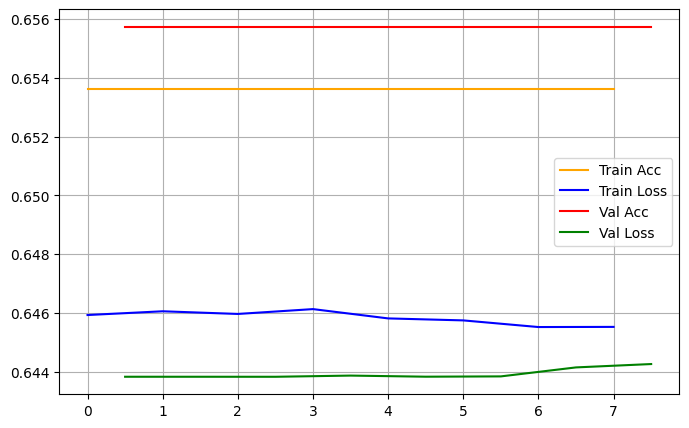

Epoch 1/32
16/16 [==============================] - 4s 32ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

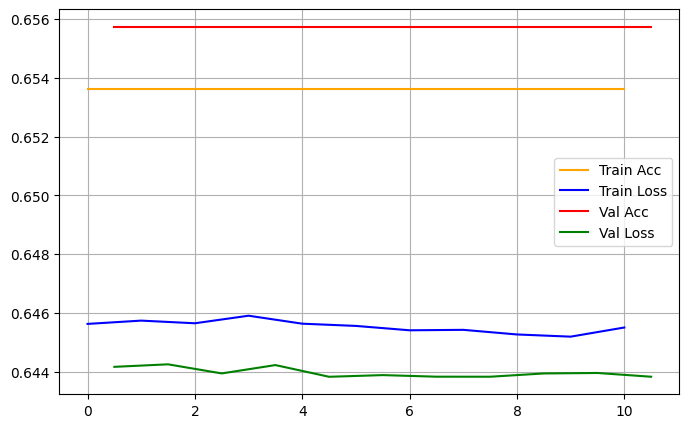

Epoch 1/100
16/16 [==============================] - 4s 32ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6444 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6460 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


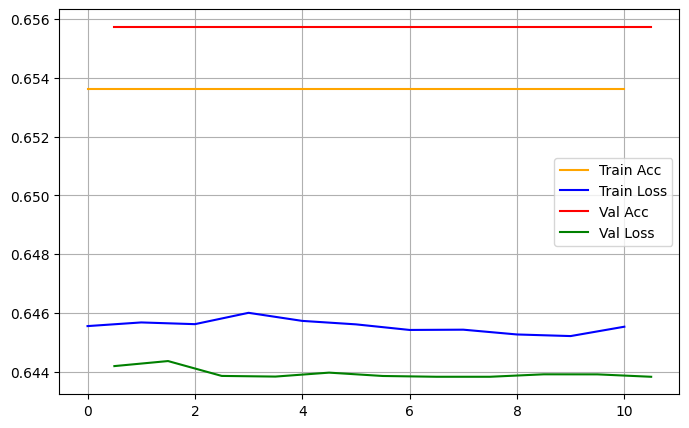

Epoch 1/120
16/16 [==============================] - 4s 31ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6441 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120


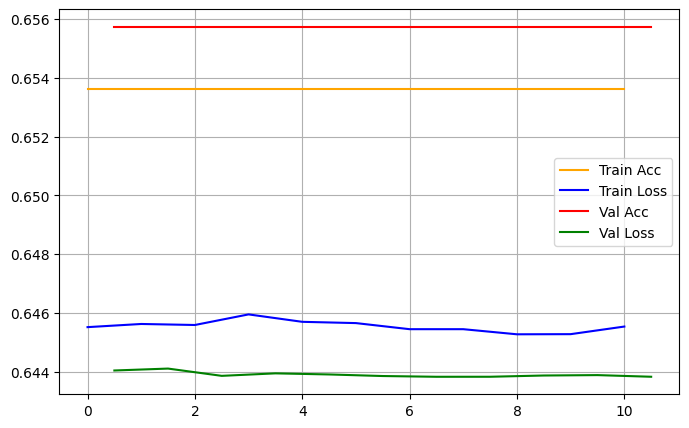

Epoch 1/8
16/16 [==============================] - 4s 30ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=========

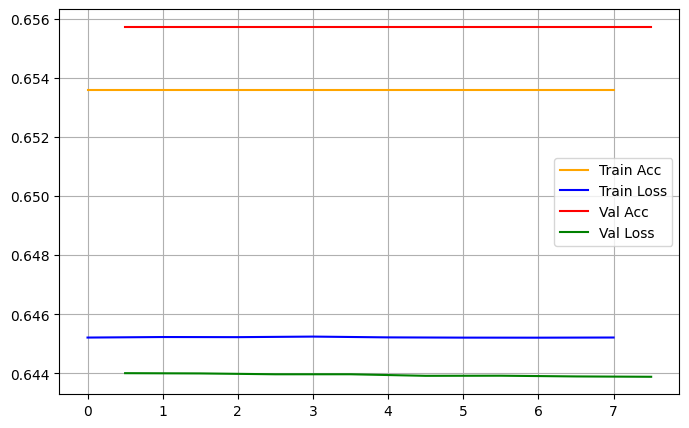

Epoch 1/32
16/16 [==============================] - 4s 34ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

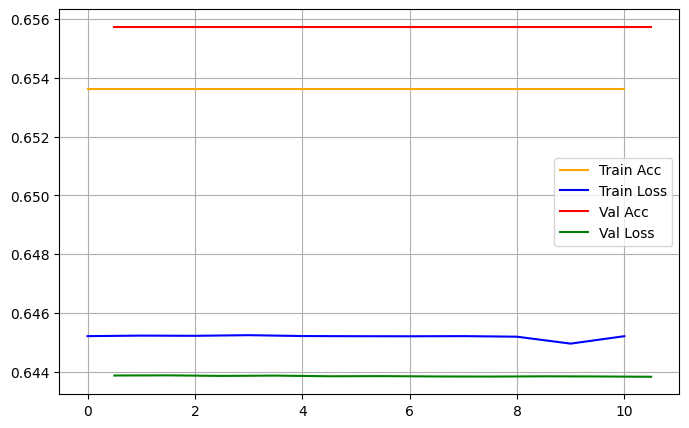

Epoch 1/100
16/16 [==============================] - 5s 32ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


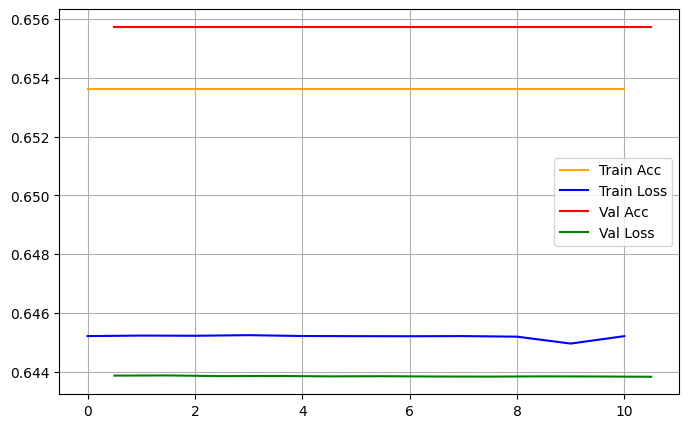

Epoch 1/120
16/16 [==============================] - 4s 31ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120


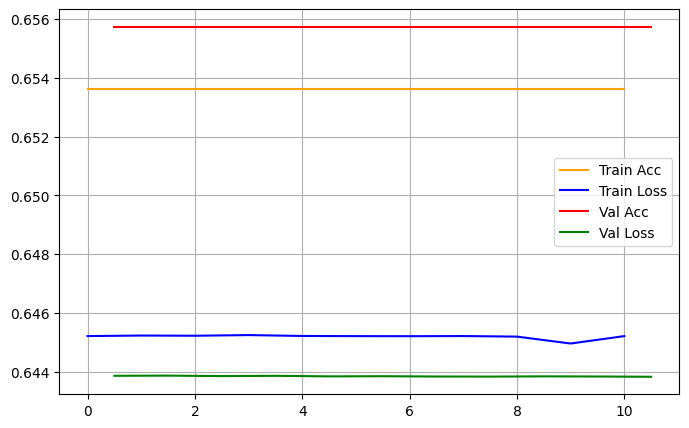

Epoch 1/8
16/16 [==============================] - 3s 31ms/step - loss: 0.6621 - accuracy: 0.6289 - val_loss: 0.6518 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6499 - accuracy: 0.6536 - val_loss: 0.6580 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6471 - accuracy: 0.6536 - val_loss: 0.6523 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 12ms/step - loss: 0.6580 - accuracy: 0.6536 - val_loss: 0.6946 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.6536 - val_loss: 0.6482 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6450 - accuracy: 0.6536 - val_loss: 0.7225 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6630 - accuracy: 0.6536 - val_loss: 0.6446 - val_accuracy: 0.6557
Epoch 8/8
16/16 [========

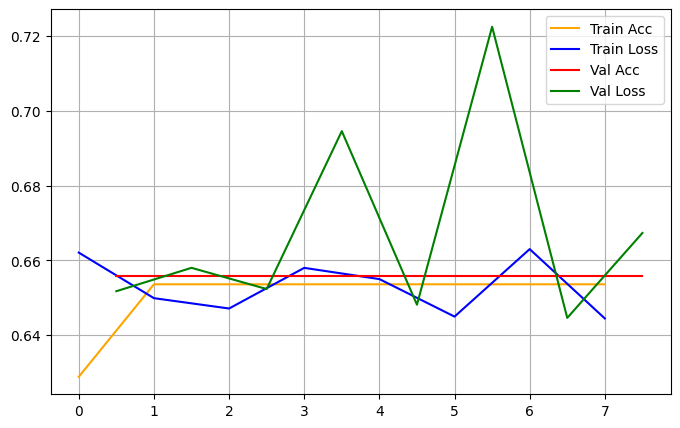

Epoch 1/32
16/16 [==============================] - 3s 31ms/step - loss: 0.6583 - accuracy: 0.6495 - val_loss: 0.6489 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6537 - accuracy: 0.6330 - val_loss: 0.6798 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6467 - accuracy: 0.6536 - val_loss: 0.6503 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6511 - accuracy: 0.6536 - val_loss: 0.7140 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6583 - accuracy: 0.6536 - val_loss: 0.6511 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6450 - accuracy: 0.6536 - val_loss: 0.7035 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6592 - accuracy: 0.6536 - val_loss: 0.6481 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

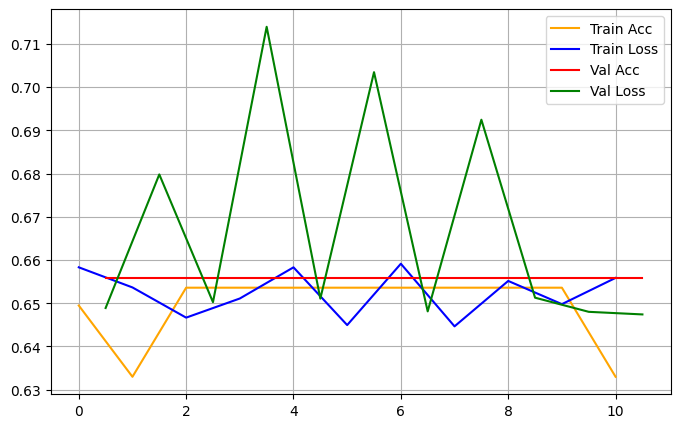

Epoch 1/100
16/16 [==============================] - 3s 32ms/step - loss: 0.6587 - accuracy: 0.6495 - val_loss: 0.6493 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6535 - accuracy: 0.6536 - val_loss: 0.6738 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6467 - accuracy: 0.6536 - val_loss: 0.6501 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6520 - accuracy: 0.6536 - val_loss: 0.6823 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6544 - accuracy: 0.6536 - val_loss: 0.6500 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6451 - accuracy: 0.6536 - val_loss: 0.7004 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6589 - accuracy: 0.6536 - val_loss: 0.6479 - val_accuracy: 0.6557
Epoch 8/100


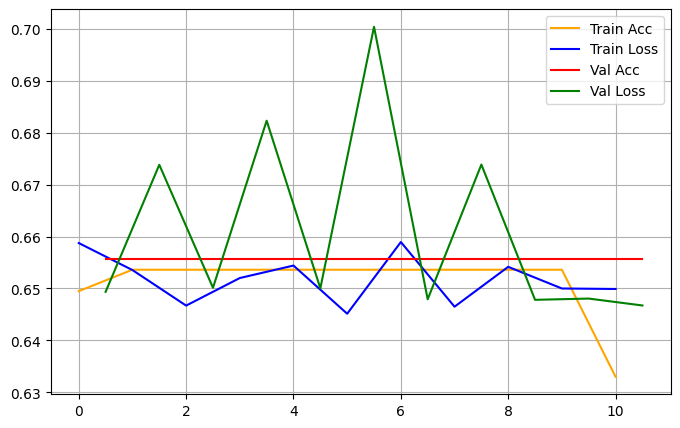

Epoch 1/120
16/16 [==============================] - 4s 33ms/step - loss: 0.6627 - accuracy: 0.6536 - val_loss: 0.6487 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6520 - accuracy: 0.6536 - val_loss: 0.6839 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6478 - accuracy: 0.6536 - val_loss: 0.6503 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6490 - accuracy: 0.6536 - val_loss: 0.6639 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6521 - accuracy: 0.6536 - val_loss: 0.6502 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6451 - accuracy: 0.6536 - val_loss: 0.7027 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6588 - accuracy: 0.6536 - val_loss: 0.6461 - val_accuracy: 0.6557
Epoch 8/120


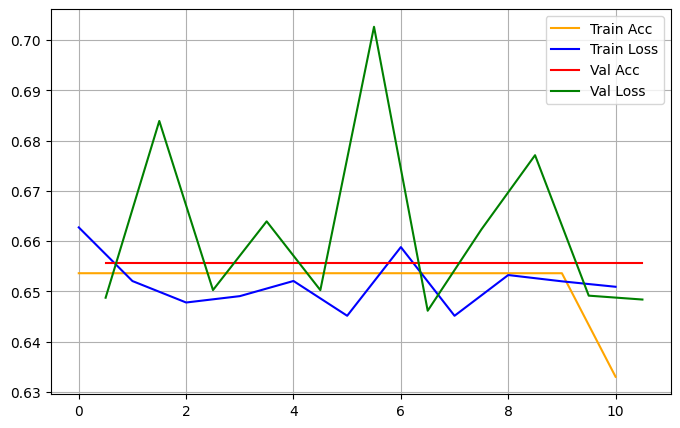

Epoch 1/8
16/16 [==============================] - 3s 32ms/step - loss: 0.6485 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6464 - accuracy: 0.6536 - val_loss: 0.6448 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6450 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 11ms/step - loss: 0.6467 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6457 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6479 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/8
16/16 [========

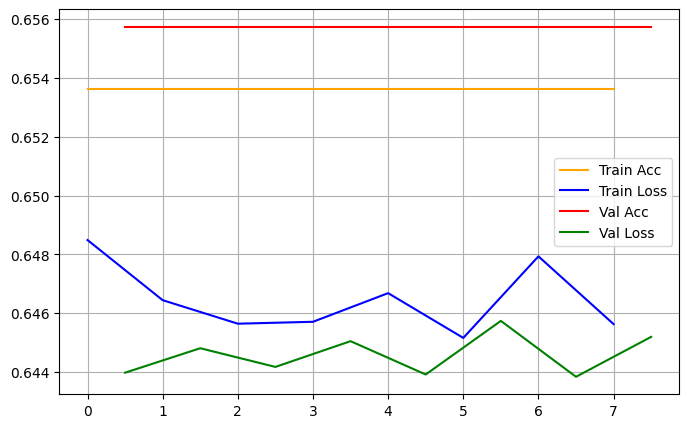

Epoch 1/32
16/16 [==============================] - 3s 31ms/step - loss: 0.6474 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6464 - accuracy: 0.6536 - val_loss: 0.6446 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6443 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6448 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6467 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6454 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

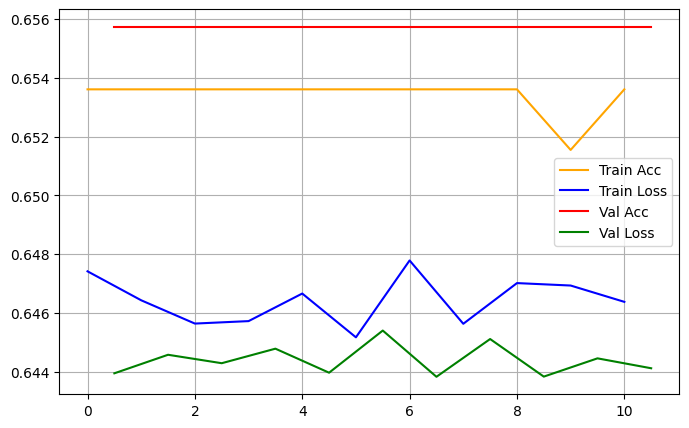

Epoch 1/100
16/16 [==============================] - 3s 32ms/step - loss: 0.6473 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6464 - accuracy: 0.6536 - val_loss: 0.6446 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6443 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6447 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6466 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6453 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


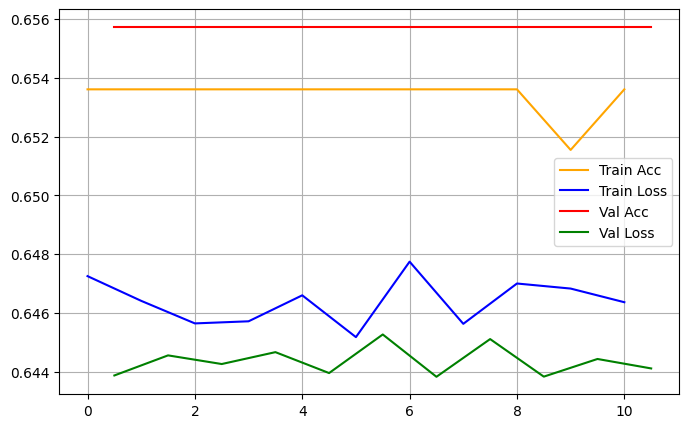

Epoch 1/120
16/16 [==============================] - 4s 33ms/step - loss: 0.6472 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 10ms/step - loss: 0.6464 - accuracy: 0.6536 - val_loss: 0.6445 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6442 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6446 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6465 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6452 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6477 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120

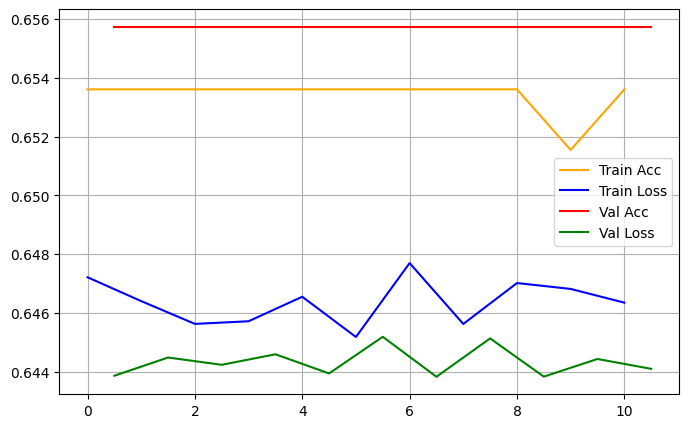

Epoch 1/8
16/16 [==============================] - 4s 32ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=========

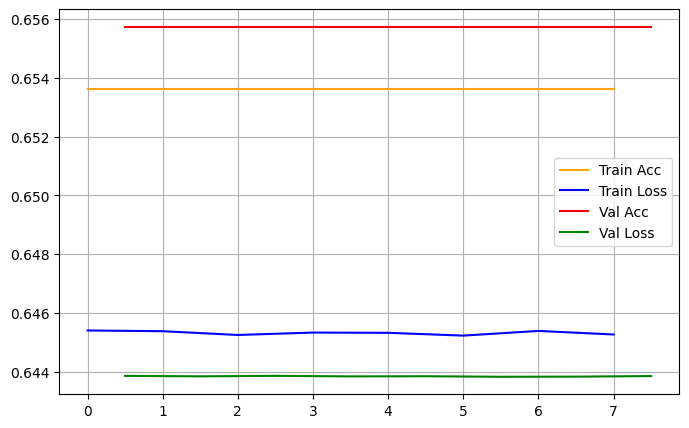

Epoch 1/32
16/16 [==============================] - 3s 32ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

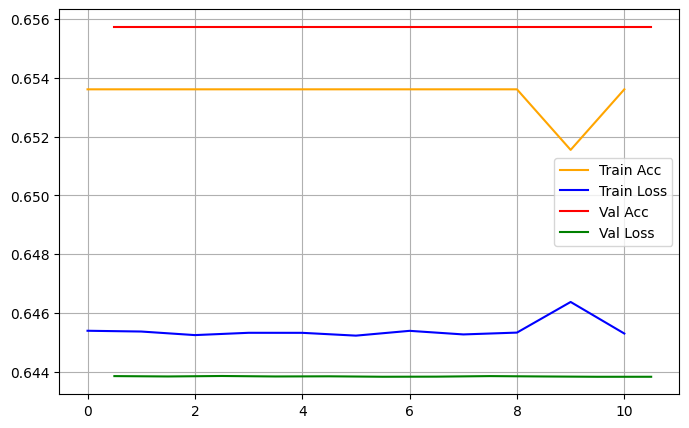

Epoch 1/100
16/16 [==============================] - 3s 33ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


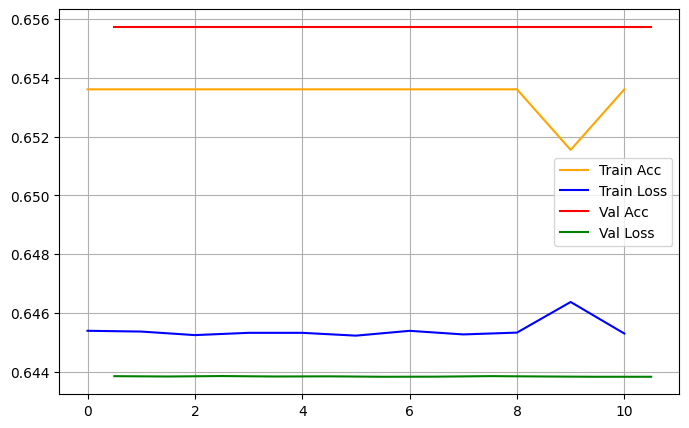

Epoch 1/120
16/16 [==============================] - 4s 31ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120


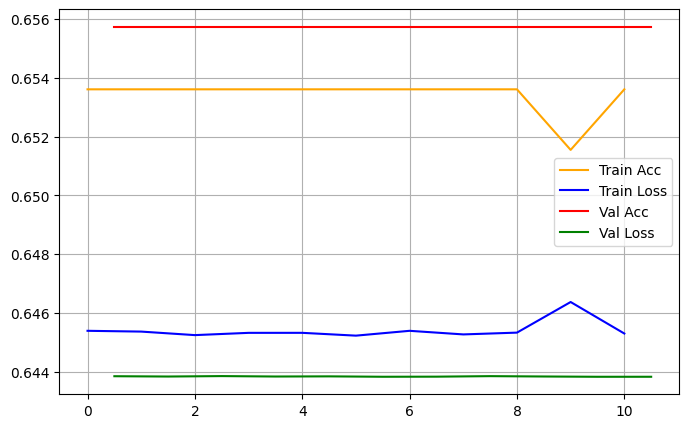

Epoch 1/8
16/16 [==============================] - 7s 33ms/step - loss: 0.6505 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6480 - accuracy: 0.6536 - val_loss: 0.6509 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 10ms/step - loss: 0.6486 - accuracy: 0.6536 - val_loss: 0.6533 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6509 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6480 - accuracy: 0.6536 - val_loss: 0.6481 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6525 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 10ms/step - loss: 0.6527 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=======

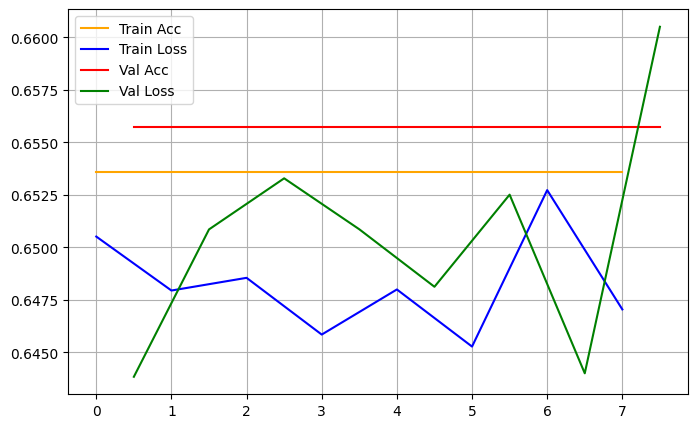

Epoch 1/32
16/16 [==============================] - 7s 37ms/step - loss: 0.6523 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.6536 - val_loss: 0.6472 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6536 - val_loss: 0.6552 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6492 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6536 - val_loss: 0.6480 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6480 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6499 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [=

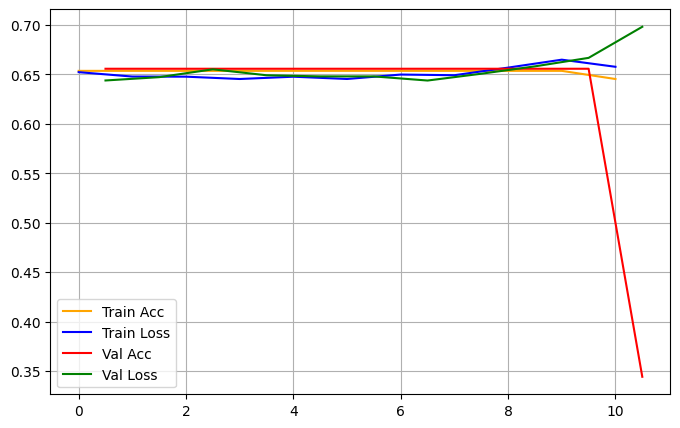

Epoch 1/100
16/16 [==============================] - 7s 32ms/step - loss: 0.6490 - accuracy: 0.6536 - val_loss: 0.6440 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6479 - accuracy: 0.6536 - val_loss: 0.6536 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6488 - accuracy: 0.6536 - val_loss: 0.6504 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6450 - accuracy: 0.6536 - val_loss: 0.6508 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6494 - accuracy: 0.6536 - val_loss: 0.6480 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6498 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6511 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100

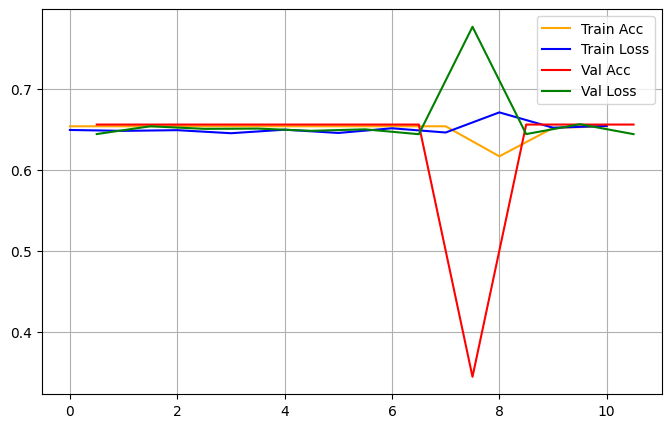

Epoch 1/120
16/16 [==============================] - 8s 36ms/step - loss: 0.6487 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6477 - accuracy: 0.6536 - val_loss: 0.6519 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6486 - accuracy: 0.6536 - val_loss: 0.6535 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 10ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6500 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6484 - accuracy: 0.6536 - val_loss: 0.6476 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 8ms/step - loss: 0.6454 - accuracy: 0.6536 - val_loss: 0.6496 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6512 - accuracy: 0.6536 - val_loss: 0.6463 - val_accuracy: 0.6557
Epoch 8/120

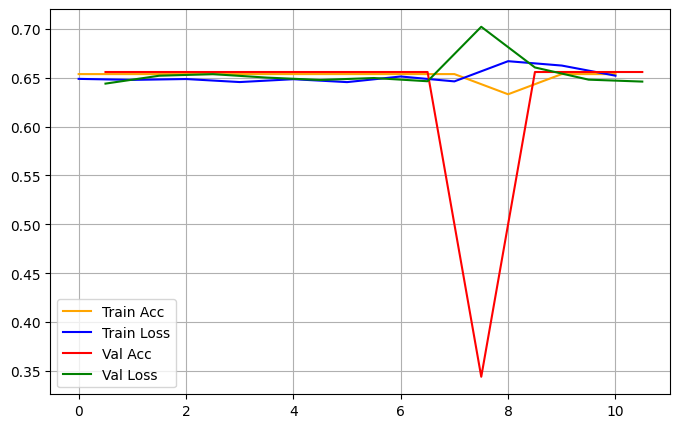

Epoch 1/8
16/16 [==============================] - 7s 34ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=========

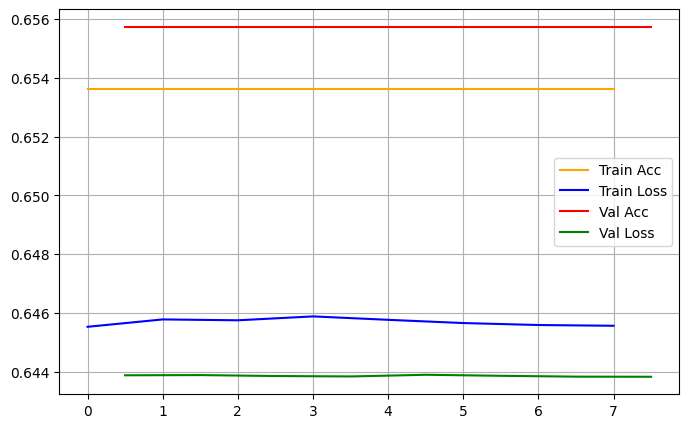

Epoch 1/32
16/16 [==============================] - 7s 34ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 10ms/step - loss: 0.6461 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 8/32
16/16 [

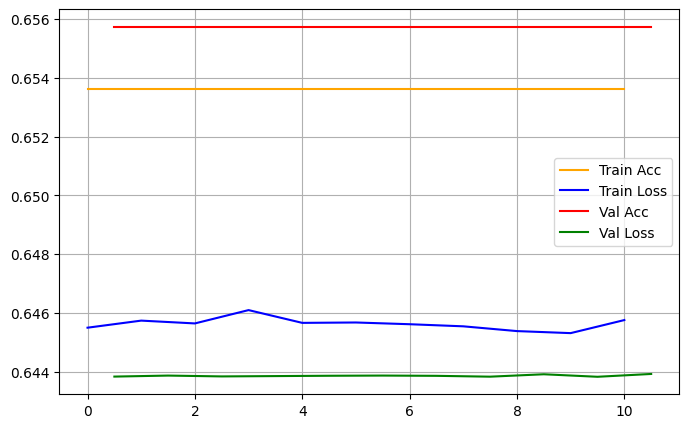

Epoch 1/100
16/16 [==============================] - 7s 32ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6460 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


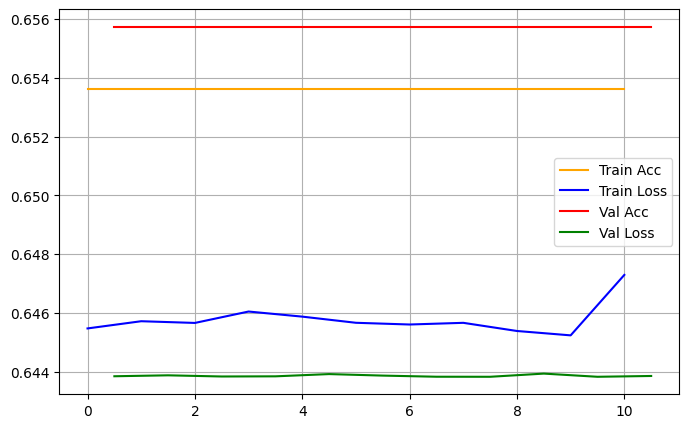

Epoch 1/120
16/16 [==============================] - 7s 33ms/step - loss: 0.6455 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6461 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6459 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6458 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120

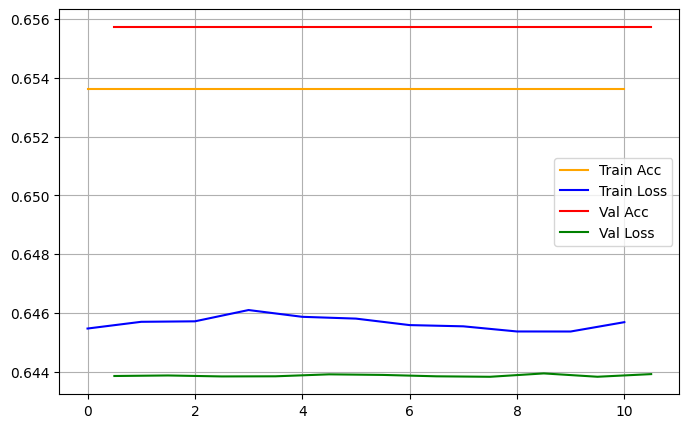

Epoch 1/8
16/16 [==============================] - 7s 32ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6439 - val_accuracy: 0.6557
Epoch 3/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/8
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/8
16/16 [=========

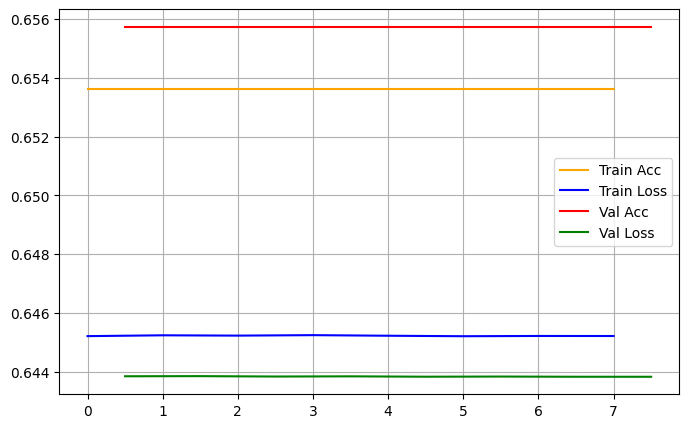

Epoch 1/32
16/16 [==============================] - 7s 34ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/32
16/16 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/32
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/32
16/16 [

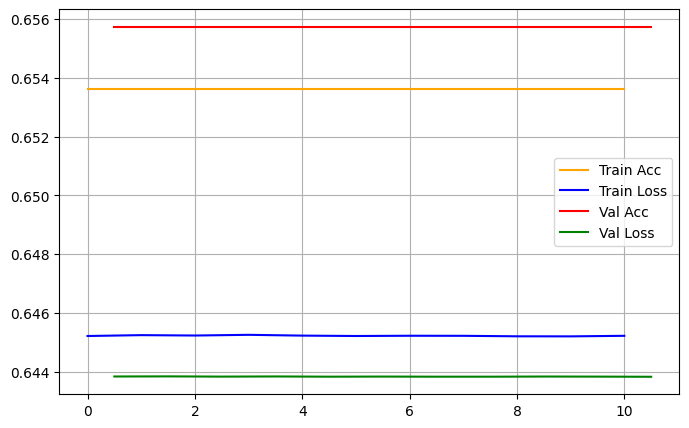

Epoch 1/100
16/16 [==============================] - 9s 35ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/100


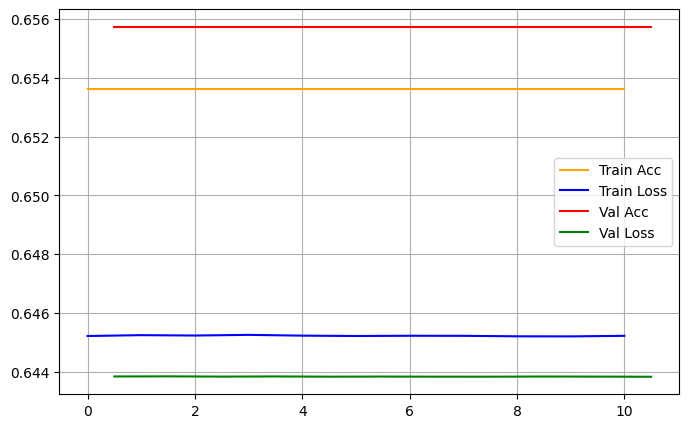

Epoch 1/120
16/16 [==============================] - 7s 32ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 2/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 3/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 4/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 5/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 6/120
16/16 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 7/120
16/16 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.6536 - val_loss: 0.6438 - val_accuracy: 0.6557
Epoch 8/120

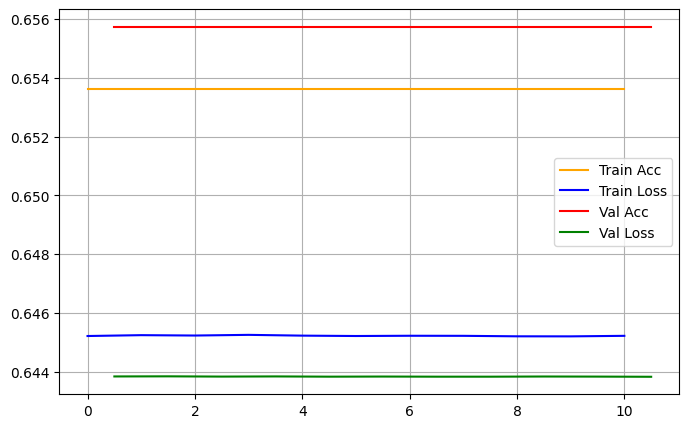

[[<class 'keras.src.optimizers.sgd.SGD'>, 0.1, 8, 0.7704917788505554], [<class 'keras.src.optimizers.sgd.SGD'>, 0.1, 32, 0.7950819730758667], [<class 'keras.src.optimizers.sgd.SGD'>, 0.1, 100, 0.7786885499954224], [<class 'keras.src.optimizers.sgd.SGD'>, 0.1, 120, 0.7950819730758667], [<class 'keras.src.optimizers.sgd.SGD'>, 0.01, 8, 0.8032786846160889], [<class 'keras.src.optimizers.sgd.SGD'>, 0.01, 32, 0.7868852615356445], [<class 'keras.src.optimizers.sgd.SGD'>, 0.01, 100, 0.7950819730758667], [<class 'keras.src.optimizers.sgd.SGD'>, 0.01, 120, 0.7868852615356445], [<class 'keras.src.optimizers.sgd.SGD'>, 0.001, 8, 0.7868852615356445], [<class 'keras.src.optimizers.sgd.SGD'>, 0.001, 32, 0.7868852615356445], [<class 'keras.src.optimizers.sgd.SGD'>, 0.001, 100, 0.7868852615356445], [<class 'keras.src.optimizers.sgd.SGD'>, 0.001, 120, 0.7868852615356445], [<class 'keras.src.optimizers.adam.Adam'>, 0.1, 8, 0.6557376980781555], [<class 'keras.src.optimizers.adam.Adam'>, 0.1, 32, 0.655737

In [37]:
#Optimizers
res=[]
optimizer= [keras.optimizers.SGD, keras.optimizers.Adam,keras.optimizers.RMSprop, keras.optimizers.Nadam]
for optimizer in optimizer:
    for lr in [0.1, 0.01,0.001]:
        for epochs in [8,32,100,120]:
            valacc, history, model = tune_hyperparamiter(epochs,batchsize,optimizer, lr)
            plot_history(history)
            res += [[optimizer, lr, epochs, valacc]]
    
print(res)

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model
model.compile(optimizer=keras.optimizers.SGD(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define early stopping & model checkpointing
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)


# Train the model
history = model.fit(X, y,
                    epochs=32,              
                    batch_size=batchsize,          # Using mini-batch gradient descent
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    verbose=1)              



Epoch 1/32


16/16 [==============================] - 2s 39ms/step - loss: 0.5149 - accuracy: 0.7381 - val_loss: 0.4898 - val_accuracy: 0.8197
Epoch 2/32
16/16 [==============================] - 0s 9ms/step - loss: 0.5013 - accuracy: 0.7546 - val_loss: 0.4873 - val_accuracy: 0.8033
Epoch 3/32
16/16 [==============================] - 0s 9ms/step - loss: 0.5294 - accuracy: 0.7608 - val_loss: 0.4911 - val_accuracy: 0.8033
Epoch 4/32
16/16 [==============================] - 0s 9ms/step - loss: 0.5304 - accuracy: 0.7402 - val_loss: 0.4899 - val_accuracy: 0.7951
Epoch 5/32
16/16 [==============================] - 0s 9ms/step - loss: 0.5211 - accuracy: 0.7381 - val_loss: 0.4927 - val_accuracy: 0.8115
Epoch 6/32
16/16 [==============================] - 0s 12ms/step - loss: 0.4908 - accuracy: 0.7567 - val_loss: 0.4886 - val_accuracy: 0.7787
Epoch 7/32
16/16 [==============================] - 0s 10ms/step - loss: 0.5138 - accuracy: 0.7134 - val_loss: 0.4889 - val_accuracy: 0.7869
Epoch 8/32
16/16 [==========

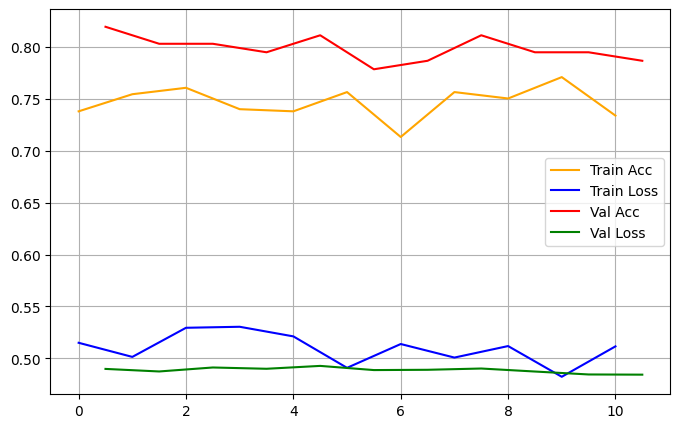

In [49]:
plot_history(history)

In [50]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Accuracy:", accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.4898 - accuracy: 0.8197
Accuracy: 0.8196721076965332


In [51]:
prediction=model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [52]:
prediction

array([[0.7387421 ],
       [0.31466734],
       [0.6922754 ],
       [0.89658874],
       [0.47633588],
       [0.7391044 ],
       [0.16424349],
       [0.91837966],
       [0.94572407],
       [0.93845904],
       [0.35628337],
       [0.2777114 ],
       [0.7448493 ],
       [0.8157931 ],
       [0.9013228 ],
       [0.5055773 ],
       [0.83418113],
       [0.78903383],
       [0.9643457 ],
       [0.43826187],
       [0.4072047 ],
       [0.36253694],
       [0.800707  ],
       [0.37080464],
       [0.7462721 ],
       [0.34743482],
       [0.43036318],
       [0.7628086 ],
       [0.58811575],
       [0.24195823],
       [0.87854415],
       [0.5457667 ],
       [0.4233151 ],
       [0.943869  ],
       [0.6504257 ],
       [0.3067828 ],
       [0.49685356],
       [0.92482334],
       [0.6313581 ],
       [0.48911908],
       [0.98589647],
       [0.17586425],
       [0.4602145 ],
       [0.6006708 ],
       [0.8606102 ],
       [0.6916871 ],
       [0.767091  ],
       [0.722

In [53]:
threshold = 0.5
binary_predictions = (prediction > threshold).astype(int)


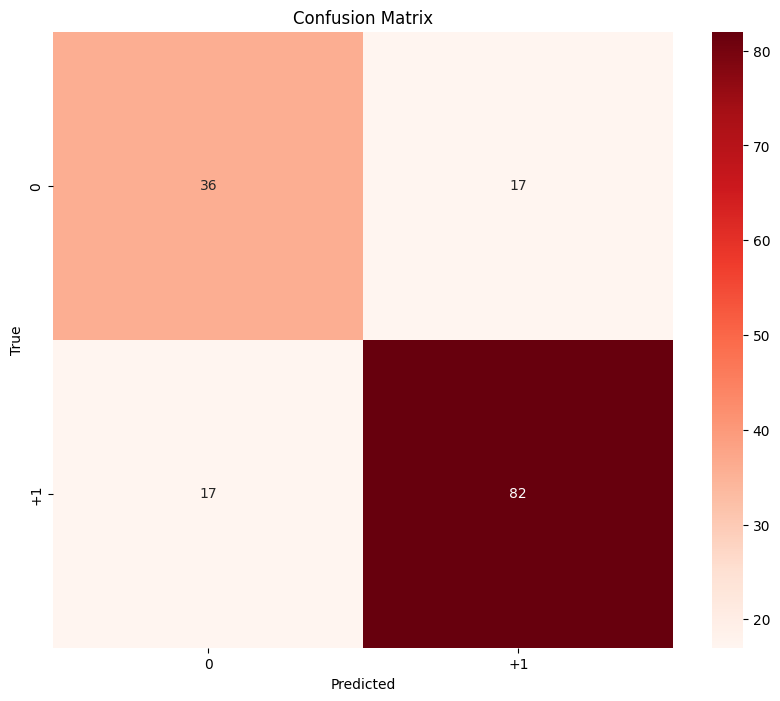

In [54]:
# Get the Confusion matrix of the best model 

from sklearn.metrics import confusion_matrix
import seaborn as sn

# Calculate the Normalized confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=binary_predictions, labels=[0, +1])

# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sn.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['0', '+1'], yticklabels=[ '0','+1'])

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [55]:
# Get the accuracy using the test set 
accuracy_class = np.diag(cm).sum() / cm.sum()
accuracy_class 

0.7763157894736842

In [56]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Assuming you have the true labels in y_test and predictions in sgd_pred
f1_score = f1_score(y_test, binary_predictions)
print("f1 score:", f1_score)
# recall
recall =recall_score(y_test, binary_predictions)
print("recall:", recall)

# precision
precision= precision_score(y_test, binary_predictions)
print("precision:", precision)

f1 score: 0.8282828282828283
recall: 0.8282828282828283
precision: 0.8282828282828283
